# Process data

http://www.rovit.ua.es/dataset/mhpdataset/


The dataset is structured by sequences. Inside each sequence you'll find the frames that compose it. A frame is composed of 4 color images, 4 sets of 2D joints as projected in each of the image planes, 4 bounding boxes, 1 set of 3D points as provided by the Leap Motion Controller and 4 sets of 3D points as reproejcted to each camera coordinate frame.

Dataset:

data_1
- 0_webcam_1.jpg
- 0_webcam_2.jpg
- 0_webcam_3.jpg
- 0_webcam_4.jpg
- 0_joints.txt
- 1_webcam_1.jpg
- 1_webcam_2.jpg
- 1_webcam_3.jpg
- 1_webcam_4.jpg
- 1_joints.txt
- ...

data_2
- ...

The files are named X_type_Y. X denotes the number of frame. As it was continuously recorded, the frames are numered in ascending order. Finally, Y denotes the source camera. As we captured data from 4 different cameras at the same time, we provide the image, the 2D points and the bounding box of the hand for each camera for each frame.

**FRAMEno_webcam_CAMERAno.jpg**

### project 3D coordinates into 2D coordinates

In [ ]:
import os
os.chdir("../mhp_dataset/utils")

In [ ]:
!python2 generate2Dpoints.py

Streaming output truncated to the last 5000 lines.
../annotated_frames/data_2/1338_joints.txt
Calibration for webcam id: 0
Saving 2d projections ../projections_2d/data_2/1338_jointsCam_1.txt
../annotated_frames/data_2/1338_webcam_2.jpg
../annotated_frames/data_2/1338_joints.txt
Calibration for webcam id: 1
Saving 2d projections ../projections_2d/data_2/1338_jointsCam_2.txt
../annotated_frames/data_2/1338_webcam_3.jpg
../annotated_frames/data_2/1338_joints.txt
Calibration for webcam id: 2
Saving 2d projections ../projections_2d/data_2/1338_jointsCam_3.txt
../annotated_frames/data_2/1338_webcam_4.jpg
../annotated_frames/data_2/1338_joints.txt
Calibration for webcam id: 3
Saving 2d projections ../projections_2d/data_2/1338_jointsCam_4.txt
../annotated_frames/data_2/1339_webcam_1.jpg
../annotated_frames/data_2/1339_joints.txt
Calibration for webcam id: 0
Saving 2d projections ../projections_2d/data_2/1339_jointsCam_1.txt
../annotated_frames/data_2/1339_webcam_2.jpg
../annotated_frames/data

### generate the bounding box coordinate txt files

In [ ]:
import os
os.chdir("../mhp_dataset/utils")

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

In [ ]:
!python2 generateBBoxes.py

Streaming output truncated to the last 5000 lines.
../annotated_frames/data_2/1338_joints.txt
Calibration for webcam id: 0
Saving bounding box ../bounding_boxes/data_2/1338_bbox_1.txt
../annotated_frames/data_2/1338_webcam_2.jpg
../annotated_frames/data_2/1338_joints.txt
Calibration for webcam id: 1
Saving bounding box ../bounding_boxes/data_2/1338_bbox_2.txt
../annotated_frames/data_2/1338_webcam_3.jpg
../annotated_frames/data_2/1338_joints.txt
Calibration for webcam id: 2
Saving bounding box ../bounding_boxes/data_2/1338_bbox_3.txt
../annotated_frames/data_2/1338_webcam_4.jpg
../annotated_frames/data_2/1338_joints.txt
Calibration for webcam id: 3
Saving bounding box ../bounding_boxes/data_2/1338_bbox_4.txt
../annotated_frames/data_2/1339_webcam_1.jpg
../annotated_frames/data_2/1339_joints.txt
Calibration for webcam id: 0
Saving bounding box ../bounding_boxes/data_2/1339_bbox_1.txt
../annotated_frames/data_2/1339_webcam_2.jpg
../annotated_frames/data_2/1339_joints.txt
Calibration for 

### process images and pickle data

In [ ]:
import os
import glob
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import numpy as np
import pickle

In [ ]:
os.chdir("../mhp_dataset")

In [ ]:
print(len(sorted(glob.glob(os.path.join("annotated_frames", "data_1","*.jpg")))))
print(len(sorted(glob.glob(os.path.join("bounding_boxes", "data_1","*.txt")))))
print(len(sorted(glob.glob(os.path.join("projections_2d", "data_1","*.txt")))))

print(len(sorted(glob.glob(os.path.join("annotated_frames", "data_2","*.jpg")))))
print(len(sorted(glob.glob(os.path.join("bounding_boxes", "data_2","*.txt")))))
print(len(sorted(glob.glob(os.path.join("projections_2d", "data_2","*.txt")))))

2832
2832
2832
6600
6600
6600


In [ ]:
# get the image filenames
path = "annotated_frames"
images_flist = []
for sub in sorted(os.listdir(path)):
  flist=sorted(glob.glob(os.path.join(path, sub,"*.jpg")))
  images_flist.extend(flist)
images_flist = sorted(images_flist)
print(len(images_flist))
print(images_flist[:10])

# get the bounding box filenames
path = "bounding_boxes"
bb_flist = []
for sub in sorted(os.listdir(path)):
  flist=sorted(glob.glob(os.path.join(path, sub,"*.txt")))
  bb_flist.extend(flist)
bb_flist = sorted(bb_flist)
print(len(bb_flist))
print(bb_flist[:10])

# get the joints filenames
path = "projections_2d"
joints_flist = []
for sub in sorted(os.listdir(path)):
  flist=sorted(glob.glob(os.path.join(path, sub,"*.txt")))
  joints_flist.extend(flist)
joints_flist = sorted(joints_flist)
print(len(joints_flist))
print(joints_flist[:10])

9432
['annotated_frames/data_1/0_webcam_1.jpg', 'annotated_frames/data_1/0_webcam_2.jpg', 'annotated_frames/data_1/0_webcam_3.jpg', 'annotated_frames/data_1/0_webcam_4.jpg', 'annotated_frames/data_1/100_webcam_1.jpg', 'annotated_frames/data_1/100_webcam_2.jpg', 'annotated_frames/data_1/100_webcam_3.jpg', 'annotated_frames/data_1/100_webcam_4.jpg', 'annotated_frames/data_1/101_webcam_1.jpg', 'annotated_frames/data_1/101_webcam_2.jpg']
9432
['bounding_boxes/data_1/0_bbox_1.txt', 'bounding_boxes/data_1/0_bbox_2.txt', 'bounding_boxes/data_1/0_bbox_3.txt', 'bounding_boxes/data_1/0_bbox_4.txt', 'bounding_boxes/data_1/100_bbox_1.txt', 'bounding_boxes/data_1/100_bbox_2.txt', 'bounding_boxes/data_1/100_bbox_3.txt', 'bounding_boxes/data_1/100_bbox_4.txt', 'bounding_boxes/data_1/101_bbox_1.txt', 'bounding_boxes/data_1/101_bbox_2.txt']
9432
['projections_2d/data_1/0_jointsCam_1.txt', 'projections_2d/data_1/0_jointsCam_2.txt', 'projections_2d/data_1/0_jointsCam_3.txt', 'projections_2d/data_1/0_join

Loading file annotated_frames/data_1/0_webcam_1.jpg


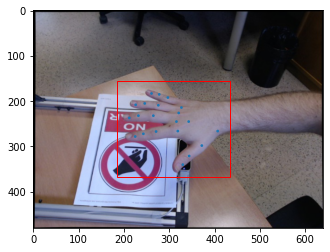

Loading file annotated_frames/data_1/0_webcam_2.jpg


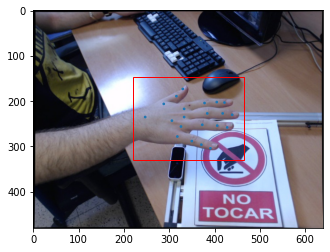

Loading file annotated_frames/data_1/0_webcam_3.jpg


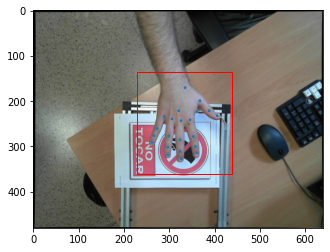

Loading file annotated_frames/data_1/0_webcam_4.jpg


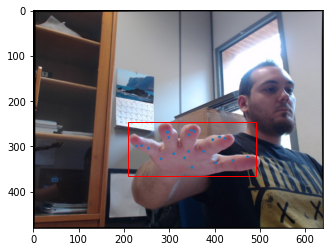

Loading file annotated_frames/data_1/100_webcam_1.jpg


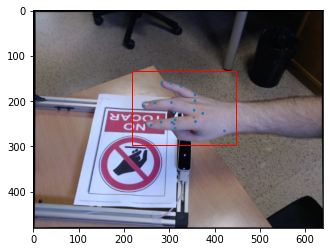

In [ ]:
n_visualize = 5

# visualize images, joints and bbox prior to processing
for i, filename in enumerate(images_flist[:n_visualize]):
  print("Loading file",filename)

  # Open image and get height and width
  im = Image.open(filename)
  w, h = im.width, im.height

  # Create a figure
  fig,ax = plt.subplots(1)
  # Show the image
  ax.imshow(im)

  # Open bounding box text file
  bb_f = open(bb_flist[i], mode="r")
  bb = bb_f.read().split() # example bb: ['TOP', '156', 'LEFT', '185', 'BOTTOM', '367', 'RIGHT', '434']
  # Work out crop coordinates, top, left, bottom, right
  l = int(bb[3])
  r = int(bb[7])
  t = int(bb[1])
  b = int(bb[5])
  ax.add_patch(Rectangle((l,b),width=(r-l),height=(t-b),linewidth=1,edgecolor='r',facecolor='none')) #bottom-left xy, width, height

  # Open joints text file
  joint_f = open(joints_flist[i],mode="r")
  joint = joint_f.read().splitlines()

  for line in joint:
    coord = line.split()[1:3]
    coord = [int(float(i)) for i in coord]
    # plot circles
    ax.add_patch(Circle(coord,3))

  # Show the image
  plt.show()
  

In [ ]:
def getNewCoords(x,y,bb,new_dim=64):
  # Work out crop coordinates, top, left, bottom, right
  bbUpperLeftX = int(bb[3]) #left
  bbUpperLeftY = int(bb[1]) #top
  bbLowerRightX = int(bb[7]) #right
  bbLowerRightY = int(bb[5]) #bottom

  sizeX = bbLowerRightX - bbUpperLeftX
  sizeY =  bbLowerRightY - bbUpperLeftY

  sizeMax = max(sizeX, sizeY)

  centerX = (bbLowerRightX + bbUpperLeftX)/2
  centerY = (bbLowerRightY + bbUpperLeftY)/2

  offsetX = (centerX-sizeMax/2)*new_dim/sizeMax
  offsetY = (centerY-sizeMax/2)*new_dim/sizeMax

  x = x * new_dim/sizeMax - offsetX 
  y = y * new_dim/sizeMax - offsetY
  return (x,y)

In [ ]:
# read the image data from .jpg files
images = []
joints = []
newsize = (64,64) 
plot = False

for i, filename in enumerate(images_flist):
  print("Loading file",filename)

  # Open image and get height and width
  im = Image.open(filename)
  # w, h = im.width, im.height

  # Open bounding box text file
  bb_f = open(bb_flist[i], mode="r")
  bb = bb_f.read().split() # example bb: ['TOP', '156', 'LEFT', '185', 'BOTTOM', '367', 'RIGHT', '434']
  # Work out crop coordinates, top, left, bottom, right
  l = int(bb[3])
  r = int(bb[7])
  t = int(bb[1])
  b = int(bb[5])

  # Crop & Resize
  cropped = im.crop((l,t,r,b)) # The box is a 4-tuple defining the left, upper, right, and lower pixel  
  resized = cropped.resize(newsize)
  images.append(np.array(resized))
  # plt.imshow(resized)

  # Create a figure
  if plot==True:
    fig,ax = plt.subplots(1)
    ax.imshow(resized)

  # Open joints text file
  joint_f = open(joints_flist[i],mode="r")
  joint = joint_f.read().splitlines()

  newjoint = []
  for line in joint:
    coord = line.split()[1:3] # remove the string part
    coord = [float(i) for i in coord] # change type of coordinates from string to float
    newcoord = getNewCoords(coord[0],coord[1], bb, new_dim=newsize[0]) # get new coordinates according to cropping and resizing
    newjoint.append(newcoord)
    # plot circles
    if plot==True: ax.add_patch(Circle(newcoord,1.5))
  joints.append(newjoint)

  # Show the image
  if plot==True: plt.show()

Streaming output truncated to the last 5000 lines.
Loading file annotated_frames/data_2/1360_webcam_2.jpg
Loading file annotated_frames/data_2/1360_webcam_3.jpg
Loading file annotated_frames/data_2/1360_webcam_4.jpg
Loading file annotated_frames/data_2/1361_webcam_1.jpg
Loading file annotated_frames/data_2/1361_webcam_2.jpg
Loading file annotated_frames/data_2/1361_webcam_3.jpg
Loading file annotated_frames/data_2/1361_webcam_4.jpg
Loading file annotated_frames/data_2/1362_webcam_1.jpg
Loading file annotated_frames/data_2/1362_webcam_2.jpg
Loading file annotated_frames/data_2/1362_webcam_3.jpg
Loading file annotated_frames/data_2/1362_webcam_4.jpg
Loading file annotated_frames/data_2/1363_webcam_1.jpg
Loading file annotated_frames/data_2/1363_webcam_2.jpg
Loading file annotated_frames/data_2/1363_webcam_3.jpg
Loading file annotated_frames/data_2/1363_webcam_4.jpg
Loading file annotated_frames/data_2/1364_webcam_1.jpg
Loading file annotated_frames/data_2/1364_webcam_2.jpg
Loading file a

In [ ]:
print("Number of image files", len(images))
print("Number of joints files", len(joints))

Number of image files 9432
Number of joints files 9432


In [ ]:
images_arr = np.asarray(images)
joints_arr = np.asarray(joints)
print(images_arr.shape)
print(joints_arr.shape)

(9432, 64, 64, 3)
(9432, 21, 2)


In [ ]:
mydict = {'images':images_arr,'joints':joints_arr}

In [ ]:
with open('data_hand_pose.pickle','wb') as file_to_dump:
  pickle.dump(mydict, file_to_dump)